In [1]:
import pandas as pd

df = pd.read_csv("bank-data.csv")

# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display shape of training and test sets
X_train.shape, X_test.shape


((32950, 20), (8238, 20))

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Apply KNN with k=5
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)

print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.8938


In [5]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions while keeping 95% variance
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Reduced feature count: {X_train_pca.shape[1]}")


Reduced feature count: 20


In [6]:
# Apply KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = knn_pca.predict(X_test_pca)
knn_pca_accuracy = accuracy_score(y_test, y_pred_pca)

print(f"KNN Accuracy after PCA: {knn_pca_accuracy:.4f}")


KNN Accuracy after PCA: 0.8997


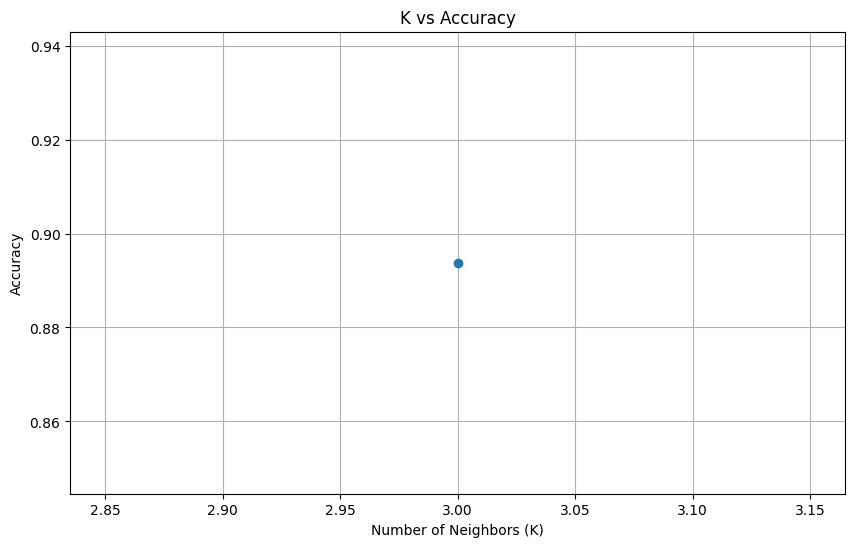

In [7]:
# Plot K vs Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(3, knn_accuracy, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

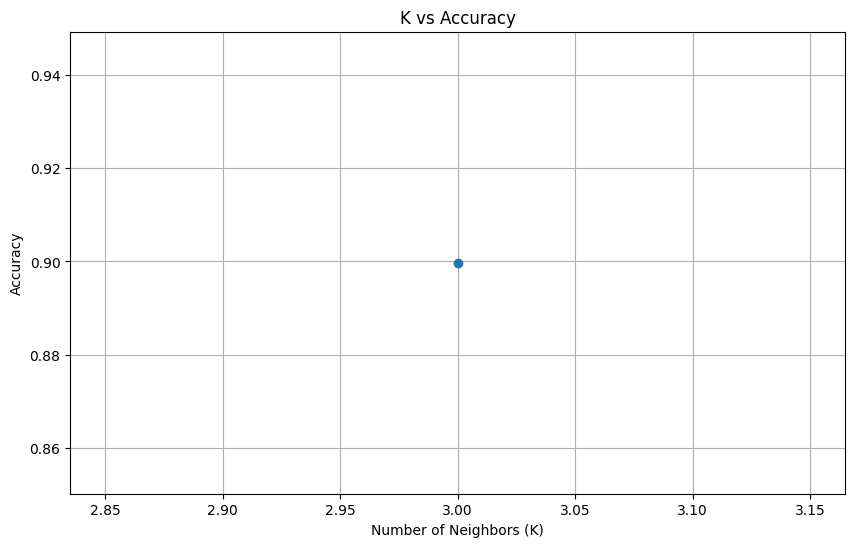

In [8]:
# Plot K vs Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(3, knn_pca_accuracy, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

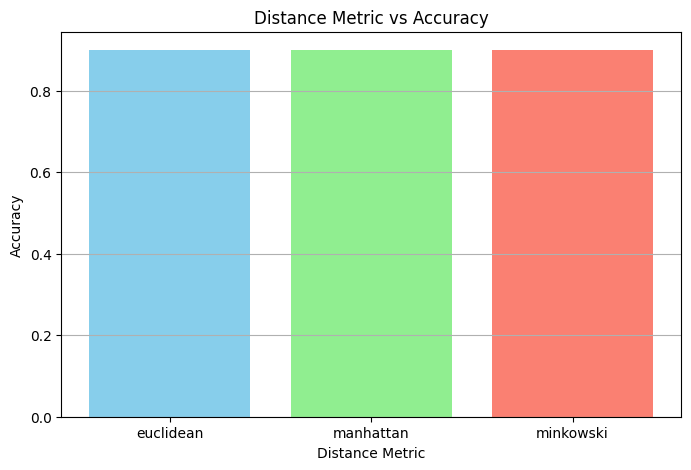

In [9]:
# Compare different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
metric_accuracies = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metric_accuracies[metric] = accuracy_score(y_test, y_pred)

# Plot Distance Metric vs Accuracy
plt.figure(figsize=(8, 5))
plt.bar(metric_accuracies.keys(), metric_accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distance Metric vs Accuracy')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Compute Voronoi diagram
vor = Voronoi(df)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax)

# Plot the original points
ax.plot(points[:, 0], points[:, 1], 'ko', markersize=5)  # 'ko' means black circles
ax.set_title("Voronoi Diagram")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
plt.show()